# Global value chains: a networks approach
### Katrina Walker, Frank Fanteev, David Rosenfeld

## Introduction

An increasingly important feature of global trade and economics since the 1980s has been the breaking up of production processes into what is known as Global Value Chains (GVCs), in part due to an increased ease of communication and coordination between different locations enabled by new telecommunication and internet technologies (Baldwin, 2016). The increasing global interconnections generated by that process has also increased the vulnerability of the global economic system to contagion of economic shocks. 

As such, understanding the nature of economic interconnections within these global value chains has become a priority area of research for governments and policy research institutions. In particular, the OECD has developed Inter-Country Input-Output (ICIO) tables, and indicators of Trade in Value Added (TiVA) which have improved our understanding of GVCs.

We will use the OECD's ICIO data in a network setting to analyse the GVCs, and specifically use community-detection algorithms to analyse the extent to which GVCs have evolved between 1995 and 2011.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [10]:
# Import the input-output table, with multi-indices for both index and columns: one for country, another for sector
input_output = pd.read_csv("input_output.csv", index_col = [0,1], header = [0,1])

In [17]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()

        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result 

In [18]:
input_output_norm = normalize(input_output)
input_output_norm[input_output_norm<0.01] = 0

where_NaN = np.isnan(input_output_norm)
input_o

a = array([[1, 2, 3], [0, 3, NaN]])
where_are_NaNs = isnan(a)
a[where_are_NaNs] = 0

In [ ]:
#make a filter for several countries

In [ ]:
smpl_cntrs = ['FRA','GBR']

In [22]:
input_output_norm[:10]


country                 ARG                                                    \
sector            C01T05AGR C10T14MIN C15T16FOD C17T19TEX    C20WOD C21T22PAP   
country sector                                                                  
ARG     C01T05AGR  1.000000  0.000000  1.000000  0.345329  1.000000  0.050761   
        C10T14MIN  0.000000  1.000000  0.000000  0.000000  0.011126  0.016406   
        C15T16FOD  0.153824  0.000000  0.381913  0.027060  0.039438  0.028339   
        C17T19TEX  0.021173  0.020064  0.013202  1.000000  0.042405  0.028049   
        C20WOD     0.034988  0.000000  0.000000  0.000000  0.859913  0.000000   
        C21T22PAP  0.000000  0.012447  0.058742  0.037428  0.048075  1.000000   
        C23PET     0.268994  0.033624  0.019448  0.023782  0.140916  0.027767   
        C24CHM     0.260017  0.033835  0.034412  0.204741  0.173580  0.197931   
        C25RBP     0.082999  0.023712  0.051796  0.047614  0.068605  0.102207   
        C26NMM     0.000000  0.031207  0.017087  0.000000  0.024997  0.045845   

country                                                    ...         ZAF  \
sector               C23PET    C24CHM    C25RBP    C26NMM  ...   C65T67FIN   
country sector                                             ...               
ARG     C01T05AGR  0.000000  0.000000  0.026309  0.000000  ...           0   
        C10T14MIN  1.000000  0.110004  0.000000  0.448413  ...           0   
        C15T16FOD  0.000000  0.120761  0.015579  0.065991  ...           0   
        C17T19TEX  0.000000  0.031122  0.048432  0.034640  ...           0   
        C20WOD     0.000000  0.000000  0.000000  0.024201  ...           0   
        C21T22PAP  0.000000  0.092583  0.034622  0.184189  ...           0   
        C23PET     0.054553  0.139738  0.141585  0.257164  ...           0   
        C24CHM     0.035328  1.000000  1.000000  0.256554  ...           0   
        C25RBP     0.000000  0.333045  0.229909  0.093836  ...           0   
        C26NMM     0.000000  0.027017  0.000000  1.000000  ...           0   

country                                                                \
sector            C70REA C71RMQ C72ITS C73T74OBZ C75GOV C80EDU C85HTH   
country sector                                                          
ARG     C01T05AGR      0      0      0         0      0      0      0   
        C10T14MIN      0      0      0         0      0      0      0   
        C15T16FOD      0      0      0         0      0      0      0   
        C17T19TEX      0      0      0         0      0      0      0   
        C20WOD         0      0      0         0      0      0      0   
        C21T22PAP      0      0      0         0      0      0      0   
        C23PET         0      0      0         0      0      0      0   
        C24CHM         0      0      0         0      0      0      0   
        C25RBP         0      0      0         0      0      0      0   
        C26NMM         0      0      0         0      0      0      0   

country                             
sector            C90T93OTS C95PVH  
country sector                      
ARG     C01T05AGR         0    NaN  
        C10T14MIN         0    NaN  
        C15T16FOD         0    NaN  
        C17T19TEX         0    NaN  
        C20WOD            0    NaN  
        C21T22PAP         0    NaN  
        C23PET            0    NaN  
        C24CHM            0    NaN  
        C25RBP            0    NaN  
        C26NMM            0    NaN  

[10 rows x 2176 columns]

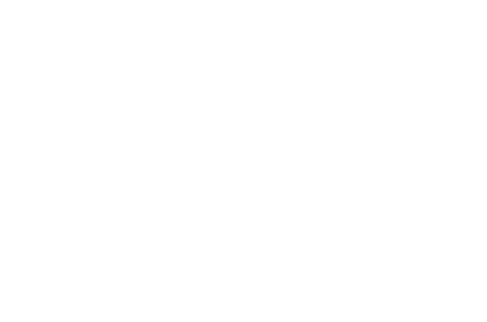

In [23]:
input_output_matrix = input_output_norm.as_matrix()

G = nx.from_numpy_matrix(input_output_matrix)

nx.draw(G)
plt.show()

In [24]:
input_output_matrix[:]

array([[ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,         nan],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,         nan],
       [ 0.15382354,  0.        ,  0.38191309, ...,  0.        ,
         0.        ,         nan],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.03724864,         nan],
       [ 0.        ,  0.        ,  0.        , ...,  0.02981716,
         0.22579774,         nan],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,         nan]])

In [7]:
input_output

country                  ARG                                          \
sector             C01T05AGR C10T14MIN  C15T16FOD C17T19TEX   C20WOD   
country sector                                                         
ARG     C01T05AGR   7219.532     2.414  23255.257  1083.401  276.029   
        C10T14MIN      9.656  3278.335    149.549    10.038    3.071   
        C15T16FOD   1110.534    16.794   8881.487    84.896   10.886   
        C17T19TEX    152.858    65.778    307.006  3137.305   11.705   
        C20WOD       252.594     1.847    164.078    14.610  237.361   
        C21T22PAP     66.374    40.805   1366.053   117.424   13.270   
        C23PET      1942.013   110.232    452.259    74.611   38.897   
        C24CHM      1877.201   110.921    800.251   642.335   47.913   
        C25RBP       599.214    77.735   1204.518   149.380   18.937   
        C26NMM        28.771   102.307    397.369    20.019    6.900   
        C27MET        72.365   301.765    134.809    15.064   14.219   
        C28FBM        73.290    61.253    410.463    66.386   25.932   
        C29MEQ        51.270    43.763    143.788    35.685    9.528   
        C30T33XCEQ    20.026    16.401     45.841    11.916    1.397   
        C31ELQ        20.854    16.958     58.193    13.136    2.864   
        C34MTR        84.737    76.166    233.841    62.352   12.610   
        C35TRQ         9.941     1.050     15.155     3.414    0.379   
        C36T37OTM     19.450   152.192     62.271    78.030    4.884   
        C40T41EGW    107.746   303.200   1510.905   301.434   64.304   
        C45CON        23.006   188.338    258.820    47.698   11.834   
        C50T52WRT   2836.447   419.335   6495.970  1490.176  154.460   
        C55HTR       207.390    32.396    311.575   119.745   21.446   
        C60T63TRN   3625.007  1458.704   3388.430   386.115  160.931   
        C64PTL       153.035   183.015    524.766   112.548   26.705   
        C65T67FIN    549.570   194.512    419.100   134.167   26.921   
        C70REA         0.000     0.480      0.000     0.000    0.000   
        C71RMQ        11.196   106.170    121.413    59.192    6.295   
        C72ITS       109.891    25.359    327.437    83.304    8.716   
        C73T74OBZ    163.102   225.399   2849.664   903.469   62.221   
        C75GOV       140.017    40.300     77.839    19.931    6.002   
...                      ...       ...        ...       ...      ...   
ZAF     C20WOD         0.001     0.000      0.000     0.000    0.001   
        C21T22PAP      0.012     0.008      0.301     0.021    0.002   
        C23PET         1.100     0.072      0.239     0.015    0.022   
        C24CHM         2.204     0.136      0.739     0.667    0.054   
        C25RBP         0.038     0.009      0.158     0.007    0.002   
        C26NMM         0.003     0.018      0.060     0.003    0.001   
        C27MET         0.020     0.161      0.000     0.000    0.002   
        C28FBM         0.158     0.097      0.767     0.051    0.068   
        C29MEQ         0.014     0.023      0.034     0.012    0.003   
        C30T33XCEQ     0.000     0.002      0.000     0.000    0.000   
        C31ELQ         0.002     0.003      0.004     0.001    0.000   
        C34MTR         0.006     0.017      0.033     0.007    0.003   
        C35TRQ         0.000     0.000      0.000     0.000    0.000   
        C36T37OTM      0.000     0.003      0.000     0.001    0.000   
        C40T41EGW      0.000     0.000      0.000     0.000    0.000   
        C45CON         0.000     0.000      0.000     0.000    0.000   
        C50T52WRT      0.295     0.000      0.231     0.078    0.012   
        C55HTR         0.000     0.000      0.000     0.000    0.000   
        C60T63TRN      0.126     0.000      0.113     0.020    0.006   
        C64PTL         0.026     0.036      0.090     0.020    0.005   
        C65T67FIN      0.017     0.007      0.013     0.004    0.001   
        C70REA         0.000     0.000  

In [ ]:
#filter input_output by index, extract 

